Global Ocean Surface Carbon

@roltech

To-do list:

- [x] I want to load the dataset.
- [x] I want to plot some selected variables.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
# import cftime

In [2]:
%matplotlib inline                          
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../Carbon/' + 'SMODE_'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
Carbonfiletype='png'

savefig = 1

In [3]:
data_source = r"C:\Users\rolte\Documents\GitHub\satellite_python_2022v2\Carbon\dataset-carbon-rep-monthly_1641771137396.nc"

In [4]:
ds = xr.open_dataset(data_source) 

In [5]:
ds

<xarray.Dataset>
Dimensions:            (time: 1, latitude: 173, longitude: 360)
Coordinates:
  * time               (time) datetime64[ns] 2020-12-15
  * latitude           (latitude) float32 -82.5 -81.5 -80.5 ... 87.5 88.5 89.5
  * longitude          (longitude) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
Data variables:
    spco2              (time, latitude, longitude) float32 ...
    spco2_uncertainty  (time, latitude, longitude) float32 ...
    ph_uncertainty     (time, latitude, longitude) float32 ...
    fgco2              (time, latitude, longitude) float32 ...
    ph                 (time, latitude, longitude) float32 ...
    fgco2_uncertainty  (time, latitude, longitude) float32 ...
Attributes:
    title:               Surface ocean carbon fields
    description:         MULTIOBS Surface carbon fields
    Conventions:         CF-1.6
    institution:         LSCE/CEA
    domain_name:         GLO
    History:             Translated to CF-1.0 Conventions by Netcdf-Java CDM ...
    geospatial_lat_min:  -82.5
    geospatial_lat_max:  89.5
    geospatial_lon_min:  0.5
    geospatial_lon_max:  359.5

In [6]:
surface_partial_pressure_of_carbon_dioxide_in_sea_water = ds.spco2
sea_water_ph_reported_on_total_scale = ds.ph

C:\Users\rolte\AppData\Local\Temp/ipykernel_16172/2070709192.py:28: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  rd = plt.colorbar(cs,fraction = 0.022,extend='both')


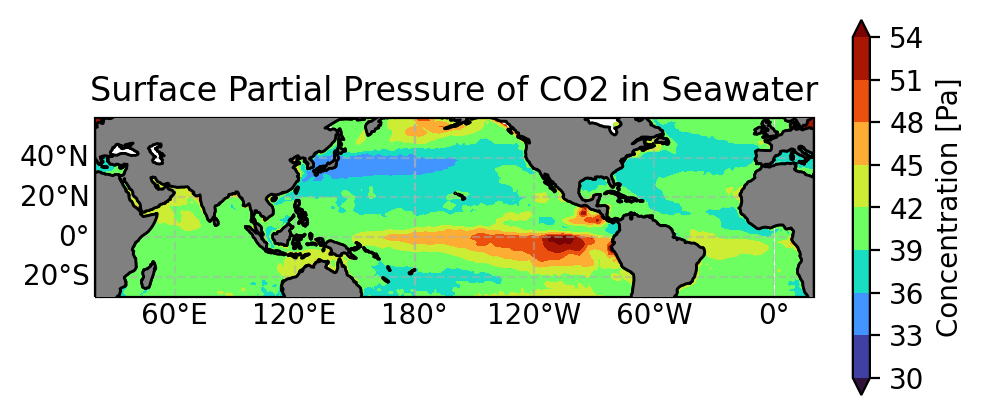

In [12]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic

Xo = 0
Yo = 0
[xmin, xmax, ymin, ymax] = [-60, 30, -30, 60]
extent = [xmin, xmax, ymin, ymax]

#tind=-1
#day_str = np.datetime_as_string(ds.time[tind], unit='D')
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Surface Partial Pressure of CO2 in Seawater')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(surface_partial_pressure_of_carbon_dioxide_in_sea_water), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
#cb = plt.colorbar(cs,fraction = 0.022,extend='both')
rd = plt.colorbar(cs,fraction = 0.022,extend='both')
rd.set_label('Concentration [Pa]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.5,.5,.5], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# Add a 10 km scale bar
#km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
#deg_lat_equal_10km=10/km_per_deg_lat
#ax.plot(-123.75+np.asarray([0, 0]),36.75+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree())

if savefig:                              
    plt.savefig(__figdir__+'Pa.'+Carbonfiletype,**savefig_args)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic

#[xmin, xmax, ymin, ymax] = [-60, 60, -60, 60]
#extent = [xmin, xmax, ymin, ymax]

#tind=-1
#day_str = np.datetime_as_string(ds.time[tind], unit='D')
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.set_title('Seawater pH Reported on Total Scale')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(sea_water_ph_reported_on_total_scale), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
#cb = plt.colorbar(cs,fraction = 0.022,extend='both')
rd = plt.colorbar(cs,fraction = 0.022,extend='both')
rd.set_label('Concentration',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.5,.5,.5], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')

# Add a 10 km scale bar
#km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
#deg_lat_equal_10km=10/km_per_deg_lat
#ax.plot(-123.75+np.asarray([0, 0]),36.75+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree())

if savefig:                              
    plt.savefig(__figdir__+'pH.'+Carbonfiletype,**savefig_args)